Calculates fuel to mod vol

In [55]:
import numpy as np
import math
import matplotlib.pyplot as plt
import re
import glob
import seaborn as sns

In [3]:
D_fuel = .96
t_gap = .01
t_clad = .06
Pi = math.pi
l = 400

A_fuel = ((D_fuel**2)*Pi)/4
Vol_fuel = A_fuel*l

A_core = ((D_fuel+(2*t_gap)+(2*t_clad))**2*Pi)/4

In [4]:
pitch = [1.10, 1.26, 1.40, 1.60, 1.80, 2.00]

In [39]:
ratio_list = []
for l in pitch:
    Vol_mod = (l**2 - A_core)*l
    ratio = Vol_mod/Vol_fuel
    #print(ratio)
    ratio_list.append(ratio)
ratio_list

[0.0009865501140475846,
 0.002773323099878325,
 0.0048821867153680705,
 0.008895369941501809,
 0.014234844360068003,
 0.021066396370120716]

In [41]:
k_list =[]

path = 'outputs/*.txt'
files = sorted(glob.glob(path))

for name in files:
    outputs = open(name, "r")
    val = 0
    #print(name)
    
    for line in outputs:
        if re.match("(.*)final result(.*)", line):
            val = line
            val_s = val.split()
            #print(val_s)
            #print(val_s[2])
        if val != 0:
            break
    k_list.append(val_s[2])
k_list    
      
        

['1.08589', '1.29581', '1.41241', '1.49206', '1.52761', '1.53516']

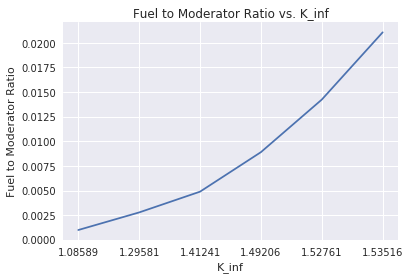

In [59]:
blue = plt.plot(k_list, ratio_list)
seaborn.set()
plt.title('Fuel to Moderator Ratio vs. K_inf')
plt.xlabel('K_inf')
plt.ylabel('Fuel to Moderator Ratio')

plt.savefig('FuelMod.jpg')
plt.show()

## Plotting for Problem 3

2.718281828459045

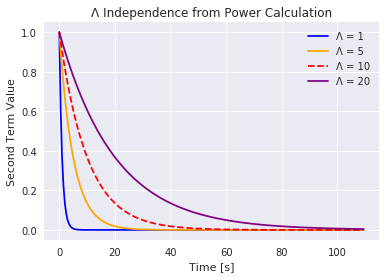

In [87]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 110, 0.5)


def power(t, Λ):
    β = 2
    ρ = 1
    E = math.e
    
    y = E**(-((β-ρ)/Λ)*t)
    return y


# red dashes, blue squares and green triangles
plt.plot(t, power(t, 1), 'b', label = 'Λ = 1')
plt.plot(t, power(t, 5), 'orange', label = 'Λ = 5')
plt.plot(t, power(t, 10), 'r--', label = 'Λ = 10')
plt.plot(t, power(t, 20), 'purple', label = 'Λ = 20')
plt.xlabel('Time [s]')
plt.ylabel('Second Term Value')
plt.title('Λ Independence from Power Calculation')
plt.legend(loc='upper right')
plt.show()

In [76]:
plt.plot?